In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional-full.csv',sep=';')

In [3]:
bank_data2=bank_data.copy()

In [4]:
bank_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank_data2['y new']=bank_data2.y.map(dict(yes=1,no=0));
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_data2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y new
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
bank_data2.age.median()

38.0

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dependent_var=bank_data2['y new']
encoded_df=bank_data2.copy()

In [9]:
encoded_df=encoded_df.drop(['y','y new'],axis=1)
encoded_df=encoded_df.apply(encoder.fit_transform)
encoded_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8


In [10]:
encoded_df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,23.023623,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,255.084976,1.566840,25.264737,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829
std,10.418993,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,238.907418,2.758711,3.832685,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,0.000000,26.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000
50%,21.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,1.000000,26.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000
75%,30.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,2.000000,26.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000
max,77.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1543.000000,41.000000,26.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000


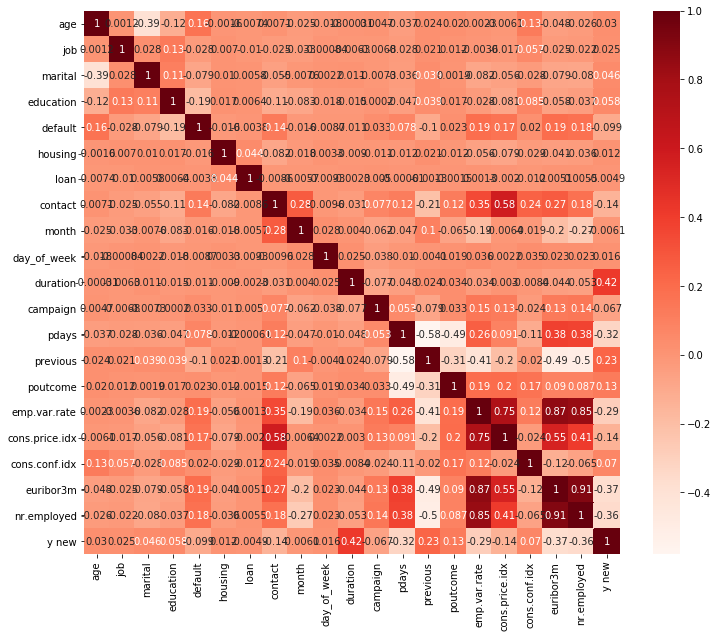

In [11]:
encoded_df2=pd.concat([encoded_df,dependent_var],axis=1)
plt.figure(figsize=(12,10))
cor=encoded_df2.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [12]:
cor_target=abs(cor['y new'])
relevant__features=cor_target[cor_target>0.2]
print(relevant__features,'\n')

duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y new           1.000000
Name: y new, dtype: float64 



In [13]:
feature_cores=encoded_df[['duration','pdays']].corr()
feature_cores1=encoded_df[['euribor3m','nr.employed']].corr()
feature_cores2=encoded_df[['job','marital']].corr()
feature_cores3=encoded_df[['marital','age']].corr()
print(feature_cores,'\n',feature_cores1,'\n',feature_cores2,'\n',feature_cores3)

          duration    pdays
duration   1.00000 -0.04782
pdays     -0.04782  1.00000 
              euribor3m  nr.employed
euribor3m     1.000000     0.912401
nr.employed   0.912401     1.000000 
               job   marital
job      1.000000  0.027897
marital  0.027897  1.000000 
           marital       age
marital  1.000000 -0.389814
age     -0.389814  1.000000


In [14]:
encoded_df=encoded_df.drop(['age','housing','loan','default','day_of_week'],axis=1)

encoded_df.describe()

,job,marital,education,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,3.72458,1.172769,3.747184,0.365252,4.230868,255.084976,1.566840,25.264737,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829
std,3.59456,0.608902,2.136482,0.481507,2.320025,238.907418,2.758711,3.832685,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,2.000000,0.000000,3.000000,102.000000,0.000000,26.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000
50%,2.00000,1.000000,3.000000,0.000000,4.000000,180.000000,1.000000,26.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000
75%,7.00000,2.000000,6.000000,1.000000,6.000000,319.000000,2.000000,26.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000
max,11.00000,3.000000,7.000000,1.000000,9.000000,1543.000000,41.000000,26.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000


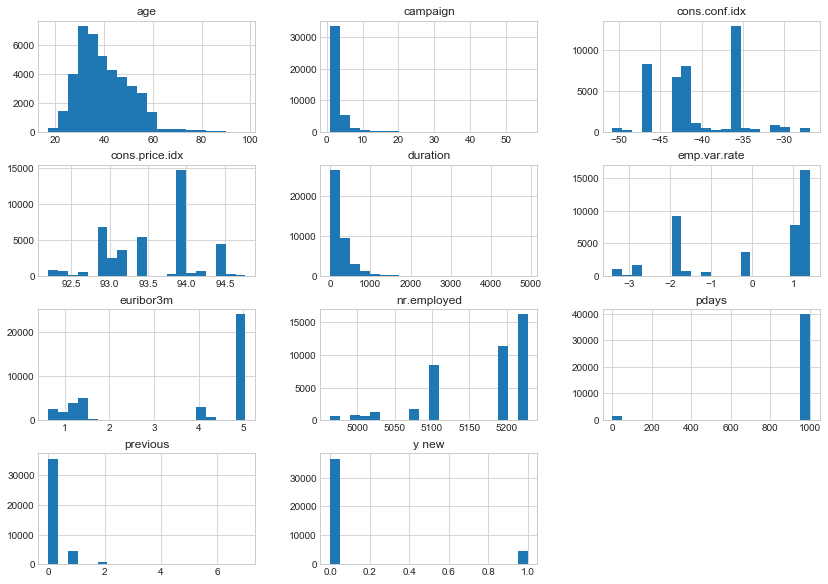

In [15]:
plt.style.use('seaborn-whitegrid')
bank_data2.hist(bins=20,figsize=(14,10))
plt.show()

In [16]:
labels='Did not open term', 'Opened term'

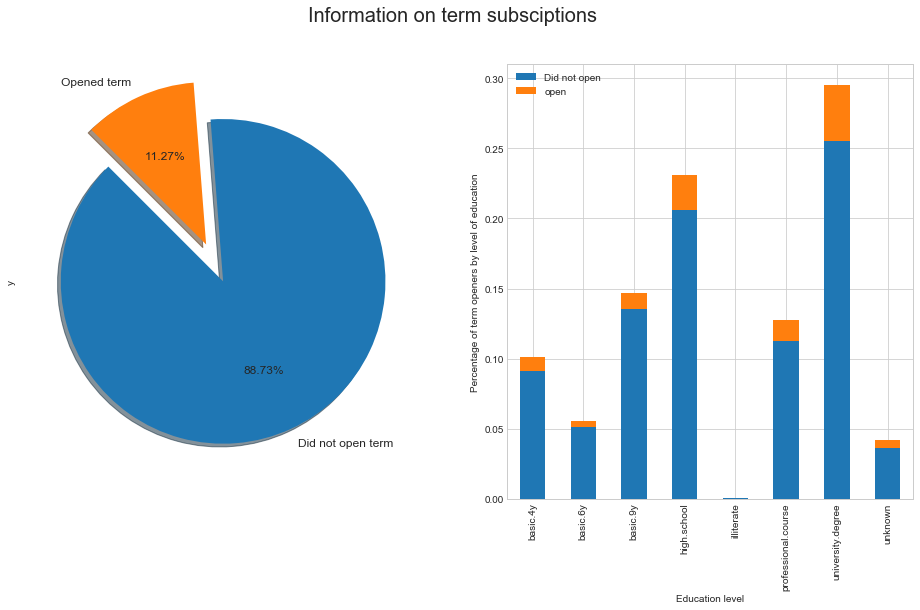

In [17]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
bank_data2['y'].value_counts().plot.pie(explode=(0,0.25),autopct='%1.2f%%',ax=ax[0],shadow=True,labels=labels,fontsize=12,startangle=135)
plt.suptitle('Information on term subsciptions',fontsize=20)
df=bank_data2.groupby(['education','y']).size().groupby(level=0).apply(lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[1],stacked=True)
ax[1].set(ylabel='Percentage of term openers by level of education')
ax[1].set(xlabel='Education level')
ax[1].legend(['Did not open','open'])

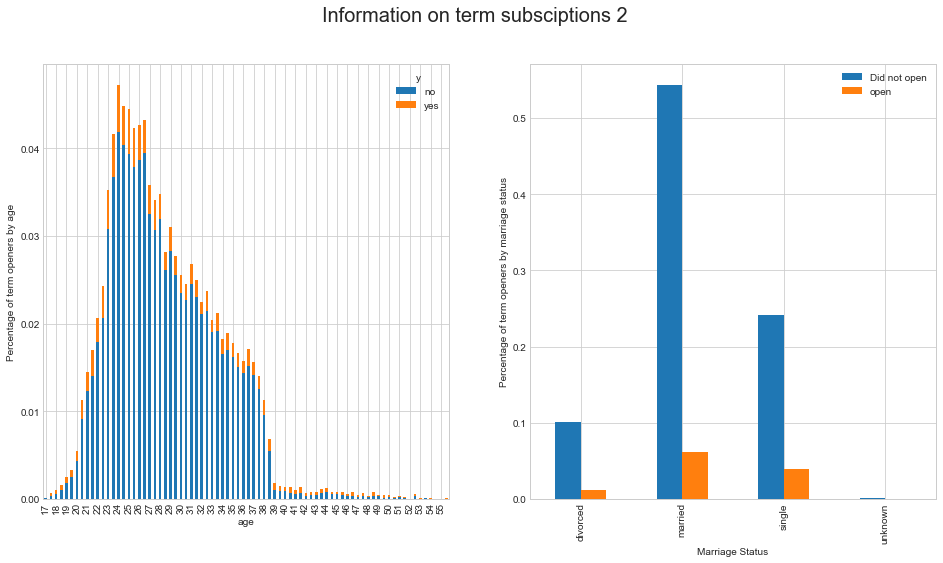

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
plt.suptitle('Information on term subsciptions 2',fontsize=20)
df=bank_data2.groupby(['age','y']).size().groupby(level=0).apply(lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[0],stacked=True)
ax[0].set(ylabel='Percentage of term openers by age')
ax[0].set(xlabel='age')
ax[0].locator_params(axis='x',nbins=60)
ax[1].legend(['Did not open','open'])
df=bank_data2.groupby(['marital','y']).size().groupby(level=0).apply(lambda x:x/bank_data2.shape[0]).unstack().plot(kind='bar',ax=ax[1])
ax[1].set(ylabel='Percentage of term openers by marriage status')
ax[1].set(xlabel='Marriage Status')
ax[1].legend(['Did not open','open'])

In [19]:
print(bank_data2.shape)

(41188, 22)


In [20]:
train_len=int(.8*(bank_data2.shape[0]))

In [21]:
train_x,train_y=encoded_df[:train_len],dependent_var[:train_len]
test_x,test_y=encoded_df[train_len:],dependent_var[train_len:]

In [22]:
from lale.lib.sklearn import PCA
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import KNeighborsClassifier as Kn
from lale.lib.sklearn import DecisionTreeClassifier as tree
from lale.lib.sklearn import SVC
from lale.lib.sklearn import RandomForestClassifier as rf
from lale.lib.xgboost import XGBClassifier
from lale.lib.lale import NoOp,ConcatFeatures
import lale
import lale.helpers
import lale.operators
from lale.lib.lale import Hyperopt
lale.wrap_imported_operators()

In [23]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [24]:
explainable_pipe=lale.operators.make_union(PCA,NoOp) >> (LogisticRegression | Kn | tree)

In [25]:
explainable_train=explainable_pipe.auto_configure(train_x,train_y,optimizer=Hyperopt,cv=3,max_evals=3,scoring='accuracy')

100%|█████████████████████████████████████████████████| 3/3 [00:32<00:00, 10.75s/trial, best loss: -0.9362670712027817]


In [26]:
#explainable_train.visualize()

In [27]:
explainable_train.pretty_print(show_imports=False,ipython_display=True)

```python
pca = PCA(svd_solver='randomized', whiten=True)
tree = tree(max_features=0.9411552821855839, min_samples_leaf=0.1713387989606097, min_samples_split=0.4296223120175698, splitter='random')
pipeline = (pca & NoOp()) >> ConcatFeatures() >> tree
```

In [28]:
print(f'the accuracy of this pipe is{sklearn.metrics.accuracy_score(test_y,explainable_train.predict(test_x))}')

the accuracy of this pipe is0.6916727361009953


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='lbfgs',penalty='l2',max_iter=10000)

log_reg_trained=log_reg.fit(train_x,train_y)

print(f'training accuracyis:{log_reg.score(train_x,train_y)}')

pred=log_reg.predict(test_x)

training accuracyis:0.9412443095599393


In [30]:
print(f'test accuracyis:{sk.metrics.accuracy_score(test_y,pred)}')

log_reg.coef_

test accuracyis:0.697742170429716


array([[ 0.00535434,  0.09293786,  0.08110473,  0.45880602, -0.05464453,
         0.00536989, -0.03745871, -0.36007073, -3.18944134, -2.42944376,
        -1.10762484, -0.0761795 , -0.05236992,  0.05721638,  0.2454679 ]])

In [31]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier()
tree_model=dec_tree.fit(train_x,train_y)
print(f'training accuracy is: {dec_tree.score(train_x,train_y)}')

training accuracy is: 0.9999089529590288


In [32]:
predl=dec_tree.predict(test_x)
print(f'test accuracy for decision tree is: {sk.metrics.accuracy_score(test_y,predl)}')

test accuracy for decision tree is: 0.6256372906045157


In [33]:
from aix360.algorithms.lime import LimeTabularExplainer
class_names=[0,1]
log_line_explainer=LimeTabularExplainer(train_x.values,class_names=class_names,feature_names=train_x.columns)

#print(f'the predicted class is: {(log_reg_trained.predict_proba([train_x.values[0]])}')
print(f'the predicted class is: {explainable_train.predict([train_x.values[0]])}')
print(f'the true class is: {(train_y.loc[0])}')

the predicted class is: [0]
the true class is: 0


In [34]:
idx=1120
exp_log=log_line_explainer.explain_instance(train_x.values[idx],log_reg_trained.predict_proba,num_features=6,labels=class_names)
#idx=10
#exp_log=log_line_explainer.explain_instance(train_x.values[idx],log_reg_trained.predict_proba,num_features=5,labels=[0,1])
print('Explanation for class %s' %class_names[0])
print('\n'.join(map(str,exp_log.as_list(label=0))))
print('Explanation for class %s' %class_names[1])
print('\n'.join(map(str,exp_log.as_list(label=1))))

Explanation for class 0
('previous <= 0.00', -0.14961012082497863)
('7.00 < emp.var.rate <= 8.00', 0.10784108893620711)
('100.00 < duration <= 175.00', 0.09395718957801948)
('nr.employed <= 8.00', 0.0411189186915014)
('0.00 < contact <= 1.00', -0.03874440731068087)
('8.00 < cons.conf.idx <= 16.00', 0.03220244267675359)
Explanation for class 1
('previous <= 0.00', 0.14961012082497863)
('7.00 < emp.var.rate <= 8.00', -0.10784108893620711)
('100.00 < duration <= 175.00', -0.09395718957801948)
('nr.employed <= 8.00', -0.041118918691501416)
('0.00 < contact <= 1.00', 0.038744407310680865)
('8.00 < cons.conf.idx <= 16.00', -0.03220244267675361)


In [35]:
exp_log.show_in_notebook(show_table=True,show_all=False)#	#log_reg_exp.show_in_notebook()

In [36]:
from aix360.metrics import faithfulness_metric,monotonicity_metric
predicted_class=log_reg.predict(test_x.values[0].reshape(1,-1))[0]
le=exp_log.local_exp[predicted_class]
m=exp_log.as_map()
x=test_x.values[0]
coefs=np.zeros(x.shape[0])
for v in le:
	coefs[v[0]]=v[1]
base=np.zeros(x.shape[0])
print('faithfulness:',faithfulness_metric(log_reg,x,coefs,base))
print('monotonicity:',monotonicity_metric(log_reg,x,coefs,base))

faithfulness: 0.10382027096636966
monotonicity: False
